# Загрузка зависимостей

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Анализ и обработка данных

In [177]:
data = pd.read_csv('train.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

Видно, что скорее всего существуют как множество полностью пустые строки, так и множество частично пустых по одним и тем же признакам.

Посмотрим на корреляцию null-значений:

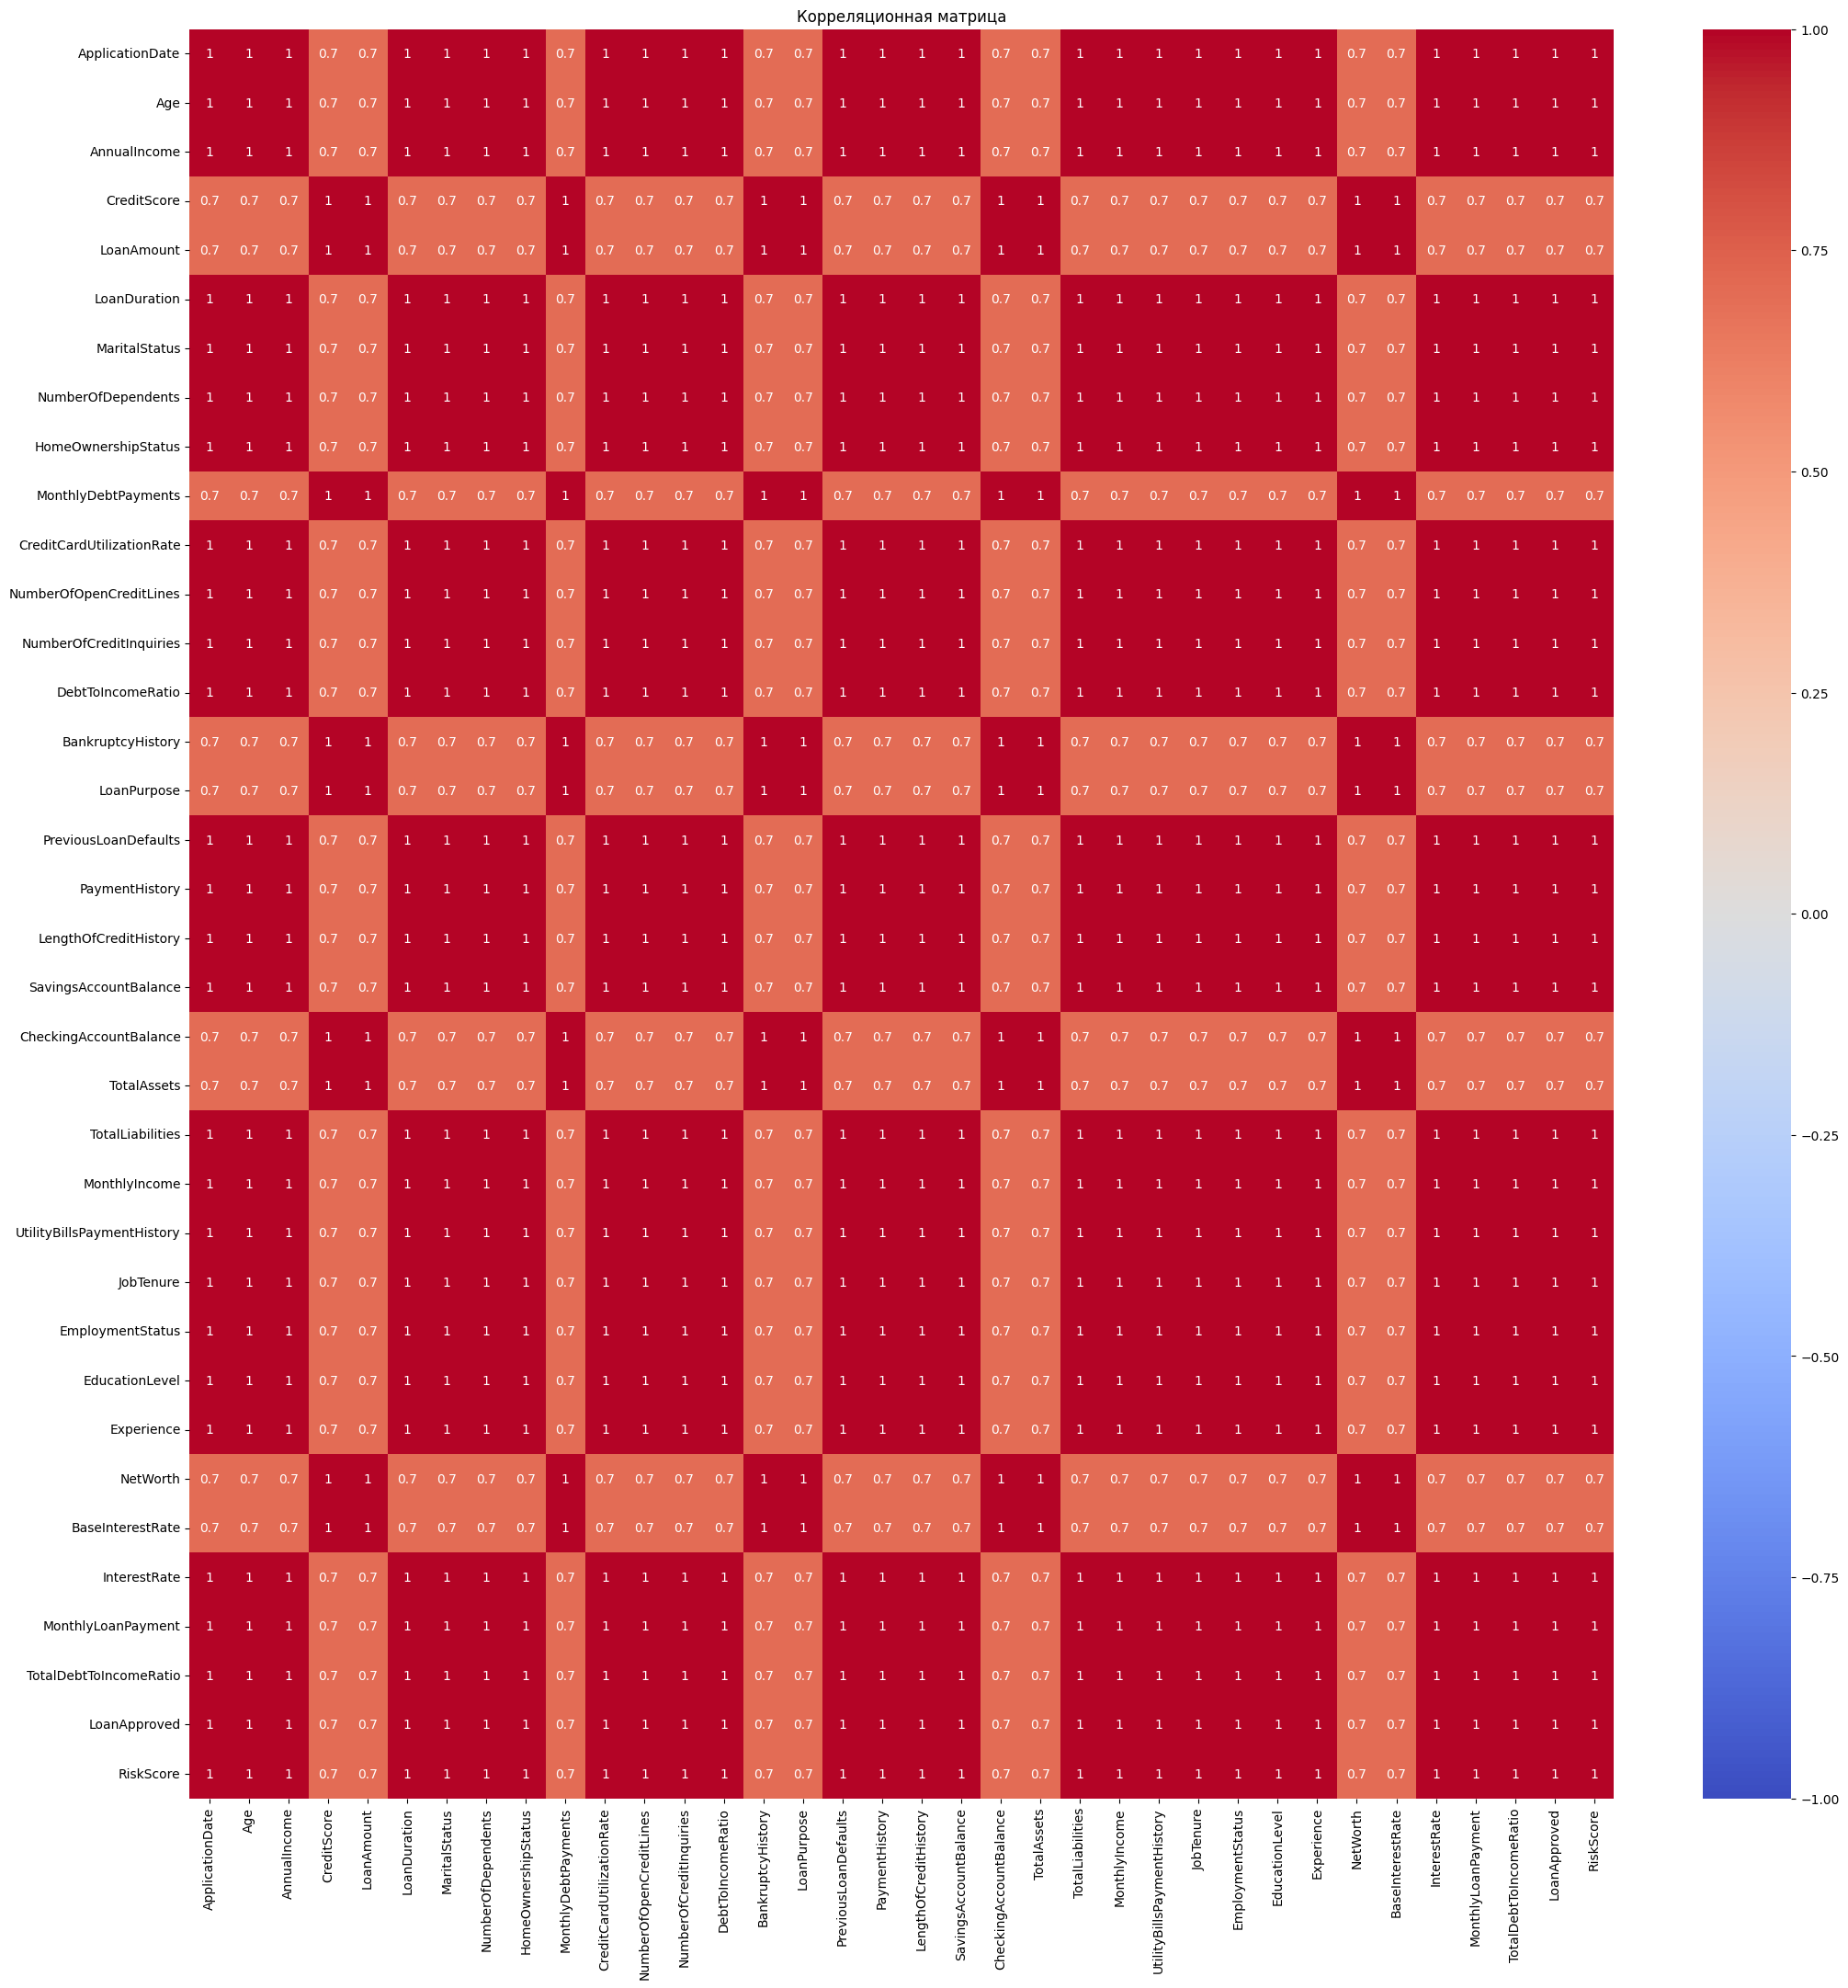

In [179]:
plt.figure(figsize=(25, 25))
sns.heatmap(data.isnull().corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

Заметим, что видно как и множество просто пустых строк, так и множество строк с одинаковыми пустыми признаками, что будет вижно на следующей матрице корреляции.

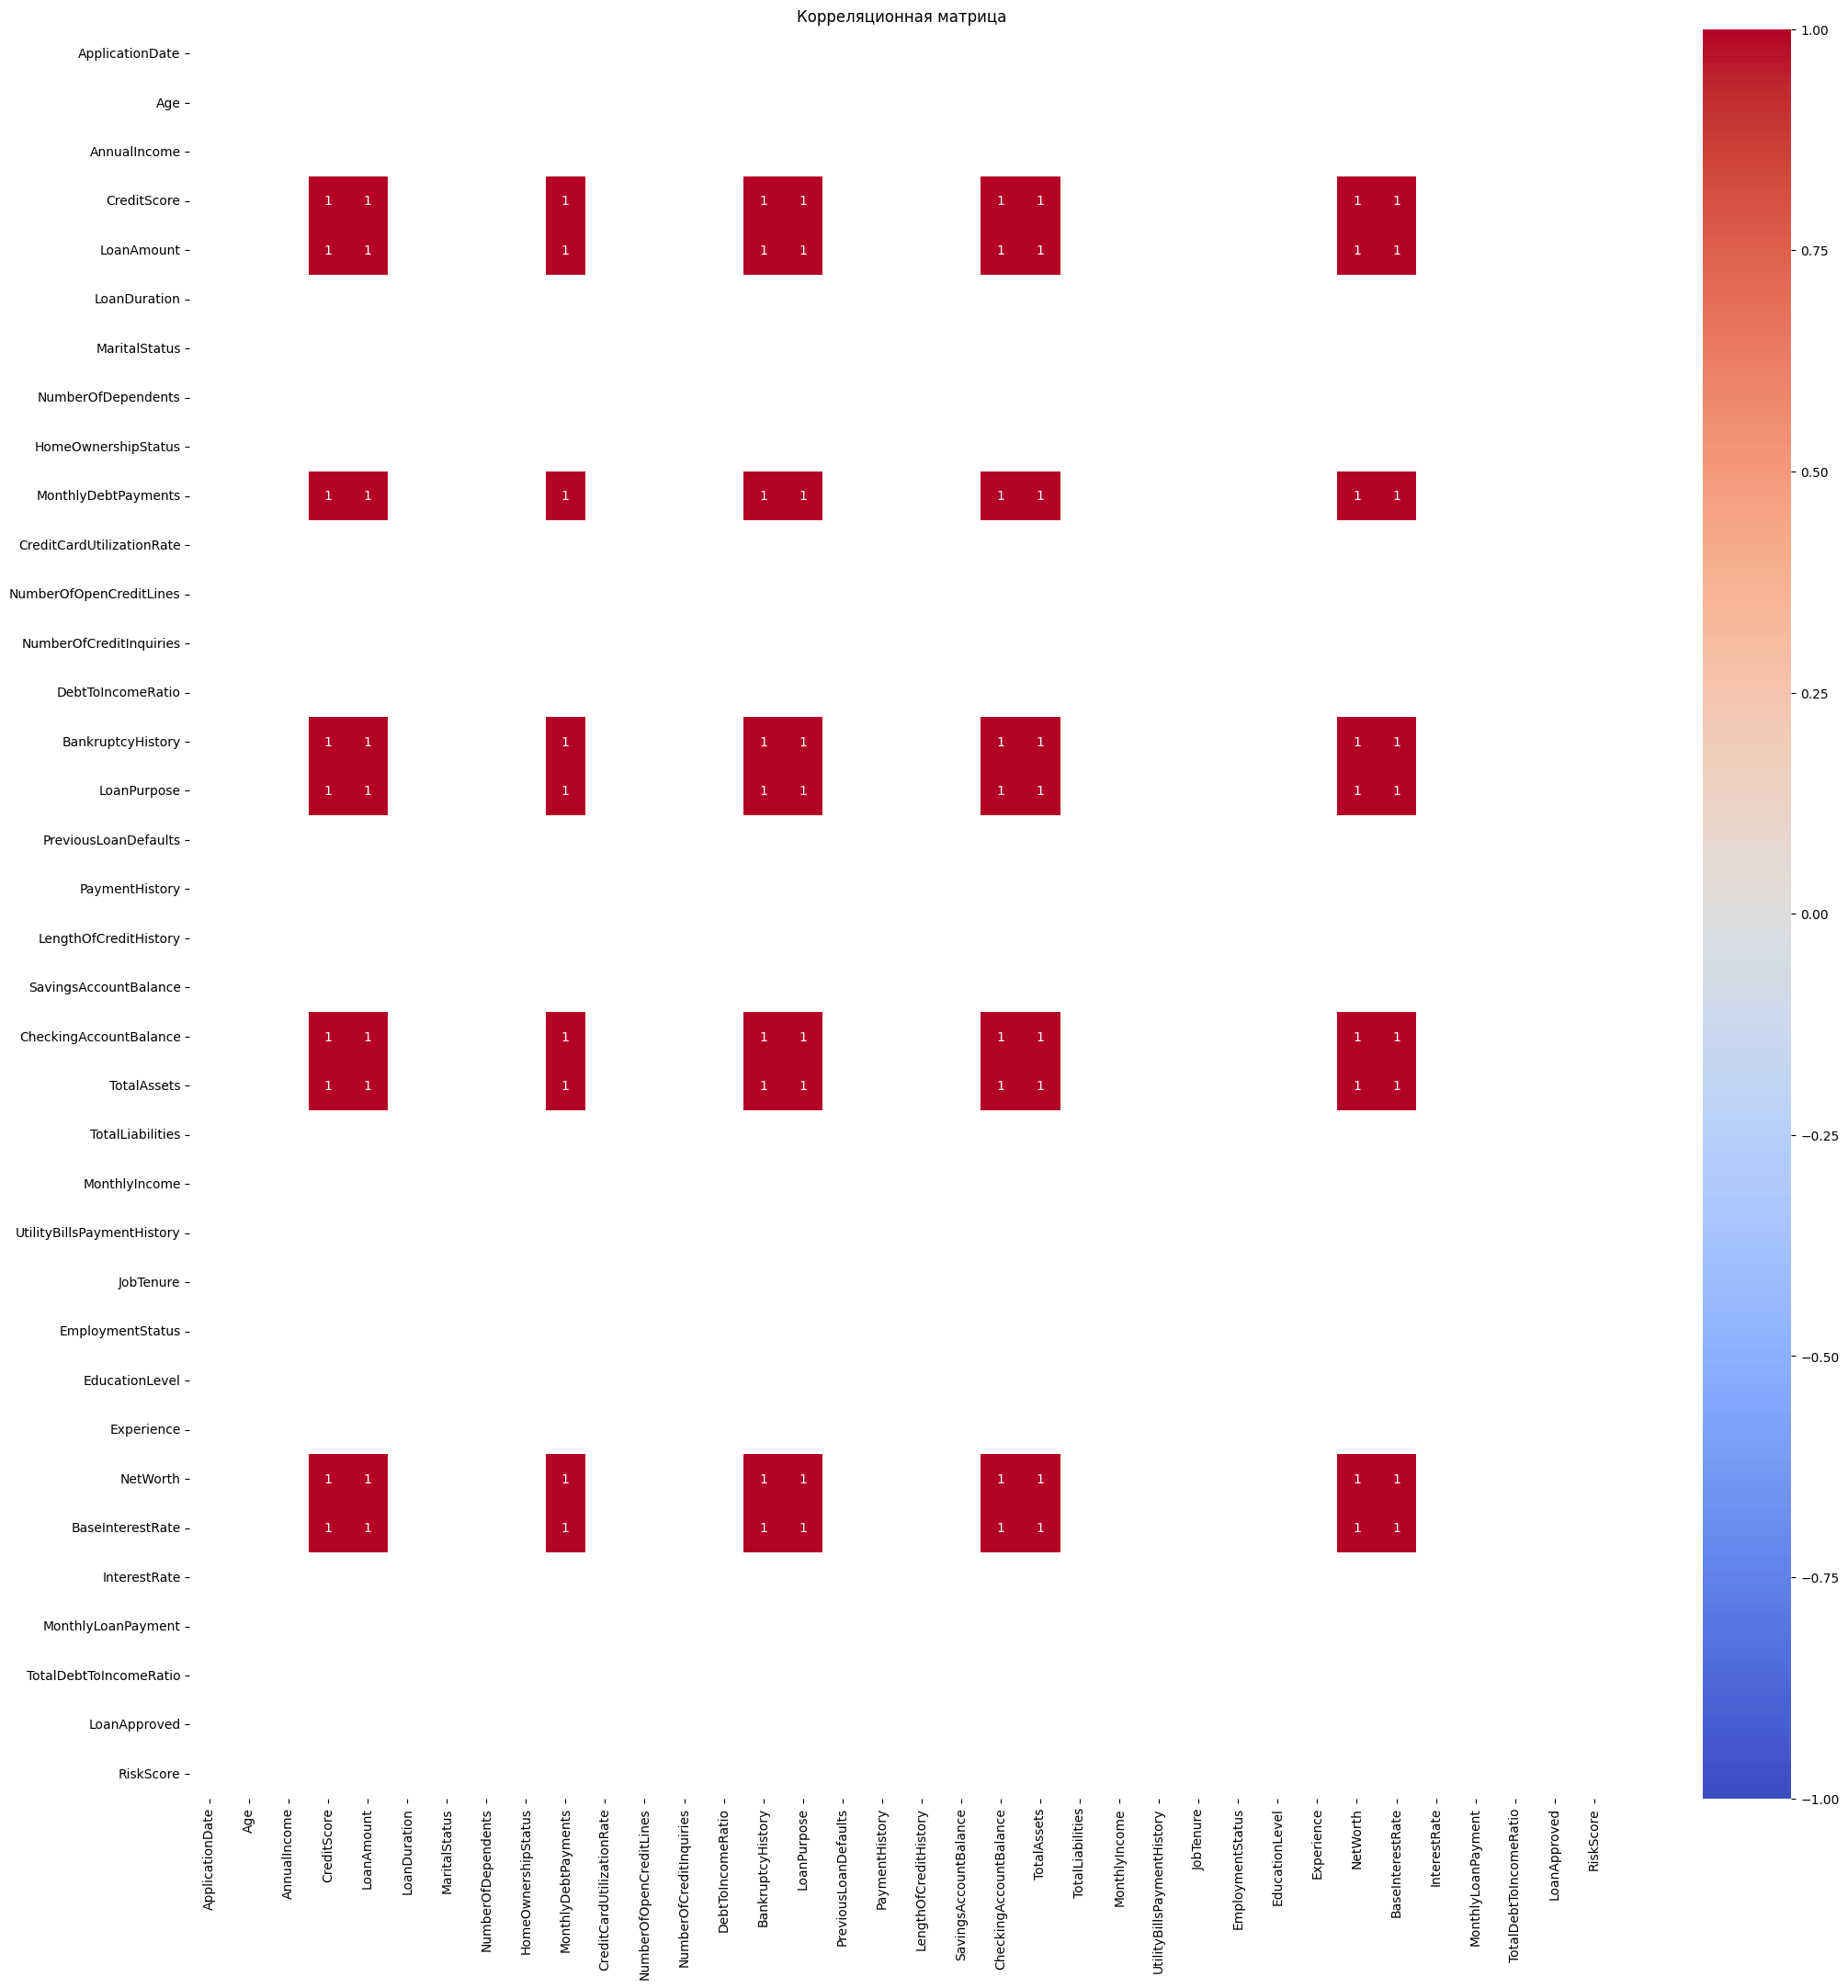

In [180]:
plt.figure(figsize=(25, 25))
sns.heatmap(data.dropna(subset=['ApplicationDate']).isnull().corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

В качетстве решения можно удалить все полностью или частично пустые строки (или же также можно предсказать значения некоторых признаков на коррелирующими с ними признаками, но тогда будет появляться линейная зависимость => придется удалять в любом случае)

In [181]:
Not_null_data = data.dropna().drop_duplicates() #Заодно и избавимся от дубликатов
Not_null_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9529 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9529 non-null   object 
 1   Age                         9529 non-null   float64
 2   AnnualIncome                9529 non-null   float64
 3   CreditScore                 9529 non-null   float64
 4   LoanAmount                  9529 non-null   float64
 5   LoanDuration                9529 non-null   float64
 6   MaritalStatus               9529 non-null   object 
 7   NumberOfDependents          9529 non-null   float64
 8   HomeOwnershipStatus         9529 non-null   object 
 9   MonthlyDebtPayments         9529 non-null   float64
 10  CreditCardUtilizationRate   9529 non-null   float64
 11  NumberOfOpenCreditLines     9529 non-null   float64
 12  NumberOfCreditInquiries     9529 non-null   float64
 13  DebtToIncomeRatio           9529 non-n

Посмотрим на описание таргет значения:

In [182]:
Not_null_data[['RiskScore']].describe(percentiles=[0.01, 0.03, 0.1, 0.5, 0.75, 0.90, 0.97, 0.99])

,RiskScore
count,9.529000e+03
mean,-3.458380e+04
std,1.437496e+06
min,-9.999999e+06
1%,-9.999999e+06
3%,2.432340e+01
10%,2.830098e+01
50%,4.401980e+01
75%,6.526522e+01
90%,7.256024e+01


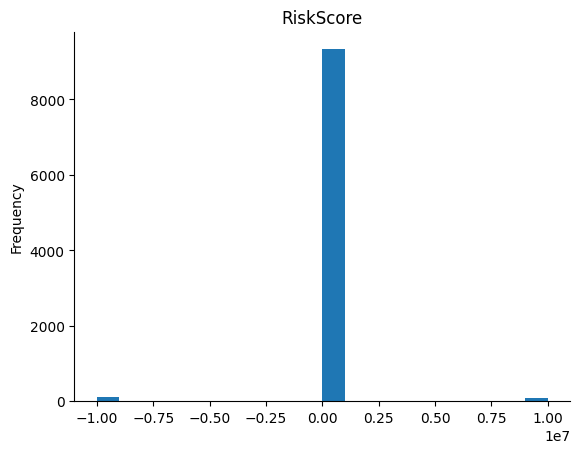

In [183]:
Not_null_data['RiskScore'].plot(kind='hist', bins=20, title='RiskScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

Видно, что в краевых случаях (>99% || <1%) видны вбросы.

In [184]:
Not_null_data = Not_null_data[Not_null_data['RiskScore'] > Not_null_data['RiskScore'].quantile(q=0.01)]
Not_null_data = Not_null_data[Not_null_data['RiskScore'] < Not_null_data['RiskScore'].quantile(q=0.99)]

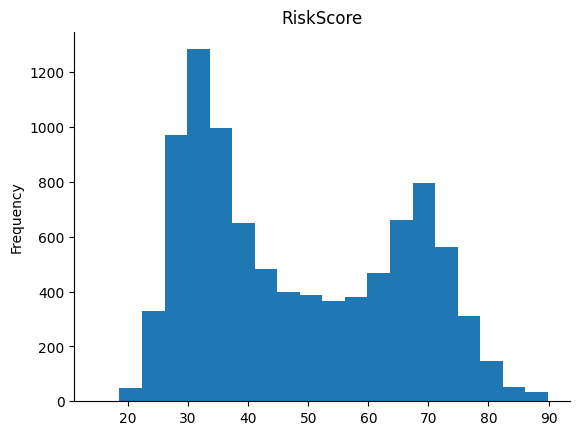

In [185]:
Not_null_data['RiskScore'].plot(kind='hist', bins=20, title='RiskScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

Заметны два основных пика на значениях в 30 и 70 процентов (=> видны две главные категории желающих взять кредит - с низким кредитным риском и высоким кредитным риском - в зависимости от их признаков)

Посмотрим на описание остальных признаков:

In [186]:
Not_null_data.describe() #Каких то очевидных вбросов не видно

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,...,9319.000000,9319.000000,9319.000000,9.319000e+03,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000
mean,39.876060,131803.106878,678.348964,29803.523232,53.374826,1.567228,547.184891,0.284877,3.031334,0.980041,...,0.783896,4.950960,17.647924,1.528397e+05,0.200108,0.199762,1072.175182,0.510388,0.513896,48.249944
std,11.578979,116025.196116,175.160576,27328.438588,24.417001,1.418140,503.700465,0.159386,1.740052,0.988140,...,0.123653,2.207924,11.312105,4.564261e+05,0.094085,0.096131,1309.231970,0.845720,0.499834,17.173265
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,0.000000,14.841417
25%,32.000000,21253.500000,550.000000,12621.000000,36.000000,0.000000,234.000000,0.159530,2.000000,0.000000,...,0.707246,3.000000,9.000000,7.302500e+03,0.119850,0.119570,374.687398,0.066393,0.000000,32.690809
50%,40.000000,89256.000000,723.000000,21801.000000,48.000000,1.000000,399.000000,0.263275,3.000000,1.000000,...,0.803878,5.000000,17.000000,2.761000e+04,0.181826,0.180252,684.665480,0.177859,1.000000,44.098093
75%,48.000000,257636.500000,850.000000,37157.000000,60.000000,3.000000,687.000000,0.391635,4.000000,2.000000,...,0.878921,6.000000,26.000000,1.233475e+05,0.264208,0.264598,1282.264970,0.636333,1.000000,65.010362
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000,89.877839


Интересно посмотреть на зависимость между месячным доходом и суммой кредита:

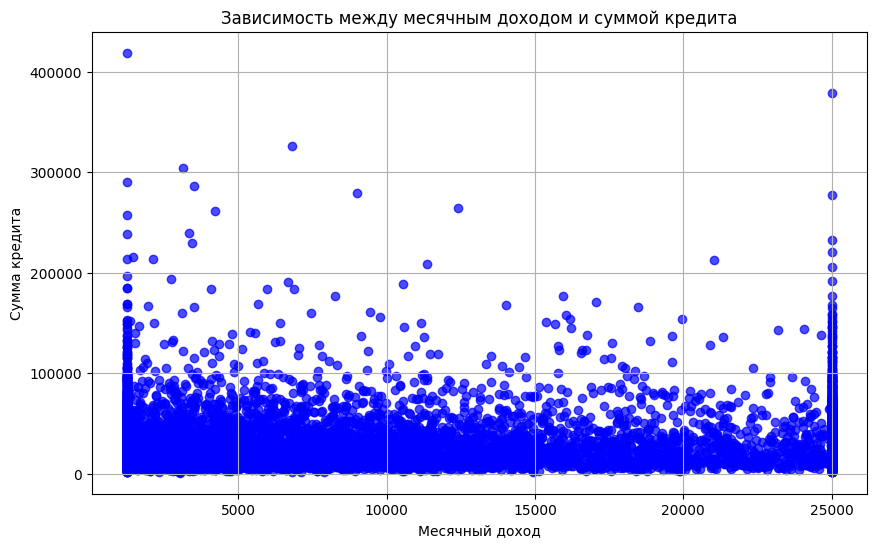

In [187]:
plt.figure(figsize=(10, 6))
plt.scatter(Not_null_data['MonthlyIncome'], Not_null_data['LoanAmount'], color='blue', alpha=0.7)
plt.title('Зависимость между месячным доходом и суммой кредита')
plt.xlabel('Месячный доход')
plt.ylabel('Сумма кредита')
plt.grid(True)
plt.show()

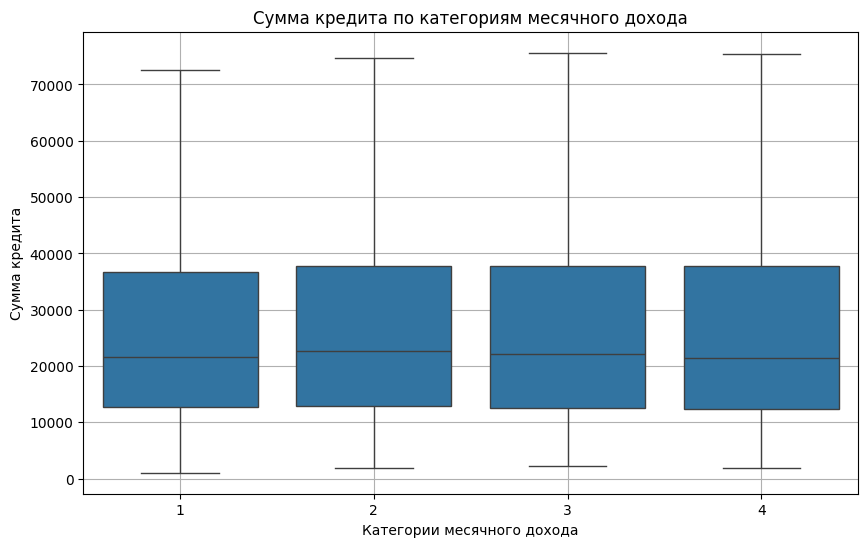

In [188]:
def categorize_income(income):
    if income < 7500:
        return 1
    elif 7500 <= income < 15000:
        return 2
    elif 15000 <= income < 22500:
        return 3
    else:
        return 4

Not_null_data['income_category'] = Not_null_data['MonthlyIncome'].apply(categorize_income)

plt.figure(figsize=(10, 6))

sns.boxplot(data=Not_null_data, y="LoanAmount", x="income_category", showfliers=False)

Not_null_data.drop(['income_category'], axis=1, inplace = True)

plt.title('Cумма кредита по категориям месячного дохода')
plt.suptitle('')
plt.xlabel('Категории месячного дохода')
plt.ylabel('Сумма кредита')
plt.grid(True)
plt.show()

Видно, что несмотря на категорию дохода, люди чаще всего берут кредиты на одни и те же суммы между данными группами.

Также интересна зависимость между апрувнутым кредитом и его процентом (видно из дальнейшей корреляционной матрицы)

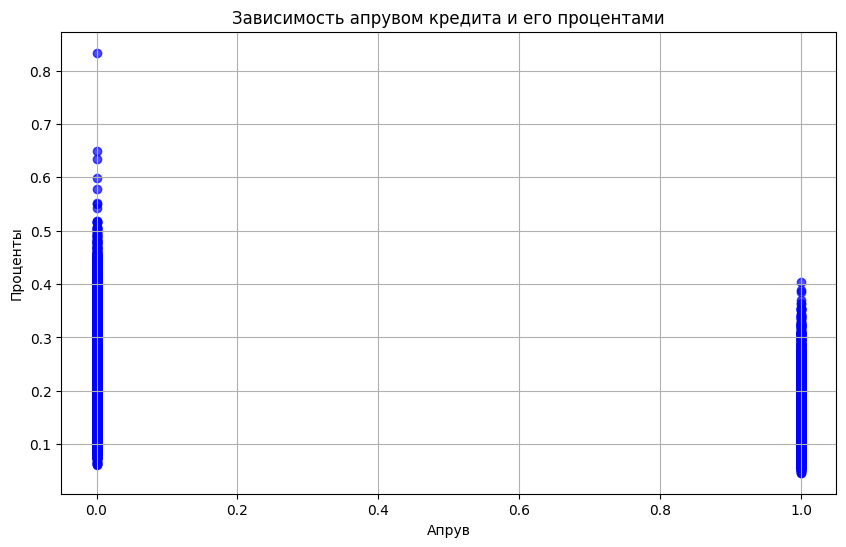

In [189]:
plt.figure(figsize=(10, 6))
plt.scatter(Not_null_data['LoanApproved'], Not_null_data['InterestRate'], color='blue', alpha=0.7)
plt.title('Зависимость апрува кредита и его процентами')
plt.xlabel('Апрув')
plt.ylabel('Проценты')
plt.grid(True)
plt.show()

Видно, что по некоторым причинам кредиты с слишком высокими процентами не особо любят апрувать (возможно из-за риска невозврата)

Проанализируем значения не числовых объектов для их дальнейшей обработки:

In [190]:
object_columns = data.select_dtypes(include=['object']).columns
object_columns

Index(['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus',
       'LoanPurpose', 'EmploymentStatus', 'EducationLevel'],
      dtype='object')

In [191]:
for column in object_columns:
    print(f'{column}: {data[column].unique()}')

ApplicationDate: ['2010-06-26' '1996-09-23' '2015-01-19' ... '2010-11-07' '2001-12-28' nan]
MaritalStatus: ['Divorced' 'Widowed' 'Married' 'Single' nan]
HomeOwnershipStatus: ['Rent' 'Mortgage' 'Other' 'Own' nan]
LoanPurpose: ['Education' 'Home' 'Debt Consolidation' 'Auto' 'Other' nan]
EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed' nan]
EducationLevel: ['Associate' 'High School' 'Bachelor' 'Master' 'Doctorate' nan]


Видно, что такие колонки как EducationLevel и EmploymentStatus можно преобразовать при помощи label encoding`а, т.к. представляют собой более менее последовательные множества. Остальные признаки лучше закодировать и как-либо преобразовать их в числовые данные (например в boolean при помощи one-hot encoding или числа при помощи target-encoding)

Преобразуем категориальные признаки на этой основе:

In [192]:
copy_data = Not_null_data.copy()
copy_data['EmploymentStatus'] = LabelEncoder().fit_transform(copy_data['EmploymentStatus'])
copy_data['EducationLevel'] = LabelEncoder().fit_transform(copy_data['EducationLevel'])

copy_data['MaritalStatus'] = TargetEncoder().fit_transform(
    copy_data['MaritalStatus'].values.reshape(-1, 1),
    copy_data['RiskScore'].values
    )

copy_data['HomeOwnershipStatus'] = TargetEncoder().fit_transform(
     copy_data['HomeOwnershipStatus'].values.reshape(-1, 1),
     copy_data['RiskScore'].values
     )

copy_data['LoanPurpose'] = TargetEncoder().fit_transform(
     copy_data['LoanPurpose'].values.reshape(-1, 1),
     copy_data['RiskScore'].values
     )

In [193]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9319 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9319 non-null   object 
 1   Age                         9319 non-null   float64
 2   AnnualIncome                9319 non-null   float64
 3   CreditScore                 9319 non-null   float64
 4   LoanAmount                  9319 non-null   float64
 5   LoanDuration                9319 non-null   float64
 6   MaritalStatus               9319 non-null   float64
 7   NumberOfDependents          9319 non-null   float64
 8   HomeOwnershipStatus         9319 non-null   float64
 9   MonthlyDebtPayments         9319 non-null   float64
 10  CreditCardUtilizationRate   9319 non-null   float64
 11  NumberOfOpenCreditLines     9319 non-null   float64
 12  NumberOfCreditInquiries     9319 non-null   float64
 13  DebtToIncomeRatio           9319 non-n

На данном графике рассотрим зависимости признаков друг от друга:

In [194]:
corr_matrix = copy_data.drop(['ApplicationDate', 'RiskScore'], axis=1).corr()

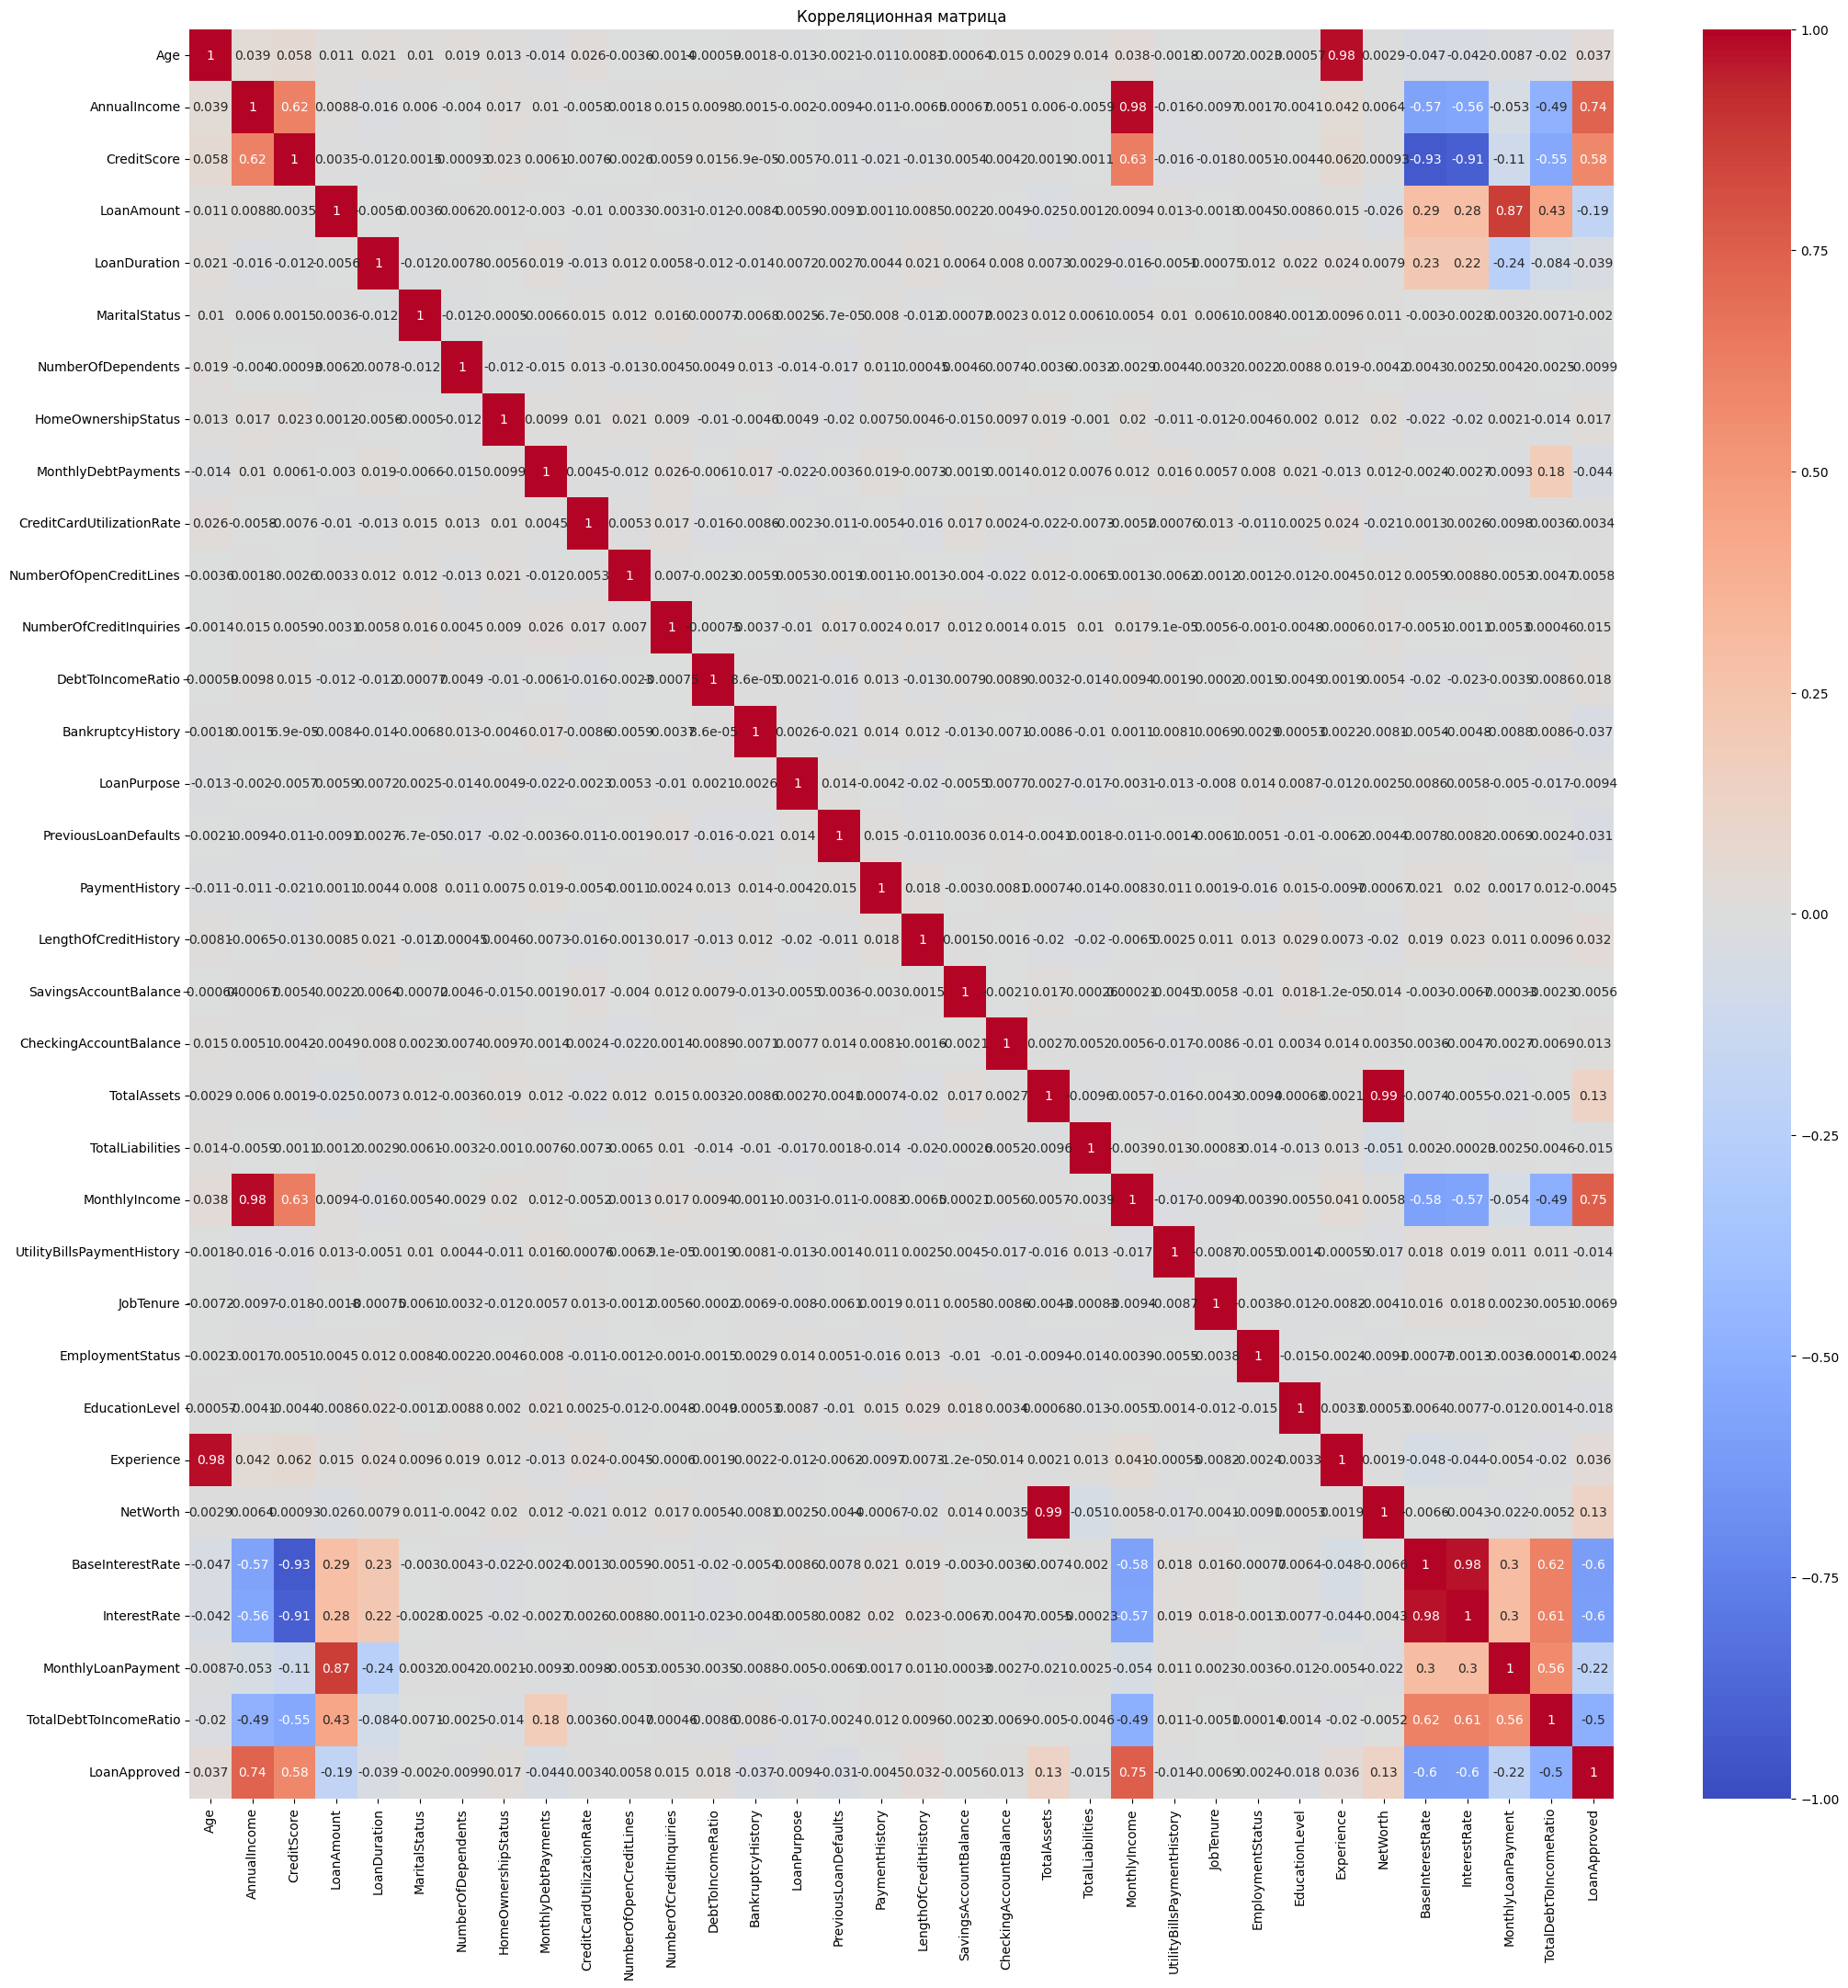

In [195]:
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

Из данного графика можно выявить список ЛН признаков, которые можно удалить: 'Experience', 'NetWorth', 'BaseInterestRate', 'MonthlyIncome', 'MonthlyLoanPayment' (корреляция > 0.75)

In [196]:
Not_null_data.drop(['Experience', 'NetWorth', 'BaseInterestRate', 'MonthlyIncome', 'MonthlyLoanPayment'], axis=1, inplace=True)

# Обучение модели

Определим для pipeline`а вышеописанные трансформы:

In [197]:
class TargetEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.te_features = ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']
        self.te = {}

    def fit(self, X, y=None):

        self.X = X.copy()
        self.y = y.copy()

        for feature in self.te_features:
          self.te[feature] = TargetEncoder()
          self.te[feature].fit(self.X[feature].values.reshape(-1, 1), self.y.values)

        return self

    def transform(self, X):

        self.X = X.copy()
        self.X.reset_index(drop=True, inplace=True)
        for feature in self.te_features:
          self.X[feature] = self.te[feature].transform(self.X[feature].values.reshape(-1, 1))

        return self.X

In [198]:
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.le = {}
        self.le_features = ['EducationLevel', 'EmploymentStatus']

    def fit(self, X, y=None):

        self.X = X.copy()

        for feature in self.le_features:
          self.le[feature] = LabelEncoder()
          self.le[feature].fit(self.X[feature])

        return self

    def transform(self, X):

        self.X = X.copy()

        for feature in self.le_features:
          self.X[feature] = self.le[feature].transform(self.X[feature])

        return self.X

Разделение данных на обучающие и тестовые:

Обучение модели:

In [199]:
X_train, X_test, y_train, y_test = train_test_split(
    Not_null_data.drop(['ApplicationDate', 'RiskScore'], axis=1),
    Not_null_data['RiskScore'],
    test_size=0.2,
    random_state=42
)

In [200]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [201]:
pipeLine.fit(X_train, y_train)

y_train_pred = pipeLine.predict(X_train)
y_test_pred = pipeLine.predict(X_test)

print(f'MSE train: {mean_squared_error(y_train, y_train_pred)}')
print(f'MSE test: {mean_squared_error(y_test, y_test_pred)}')

MSE train: 19.127406125509633
MSE test: 18.91840096878972


Сравнение с регрессией с регуляризацией:

Для начала найдем параметры для регуляризации при помощи поиска по сетке (перебором попарно на заданных массивах значений отрезка):

In [202]:
gscv = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', GridSearchCV(
        ElasticNet(),
        param_grid={
            'alpha': np.logspace(-3, 3, 7),
            'l1_ratio': np.linspace(0, 1, 11)
        },
        cv=5,
        refit=True
    ))
])

In [203]:
gscv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.756e+04, tolerance: 1.780e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.743e+04, tolerance: 1.747e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Pipeline(steps=[('label_encoder', LabelEncoderTransformer()),
                ('target_encoder', TargetEncoderTransformer()),
                ('scaler', StandardScaler()),
                ('model',
                 GridSearchCV(cv=5, estimator=ElasticNet(),
                              param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                          'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}))])

In [204]:
gscv.named_steps['model'].best_params_

{'alpha': 0.001, 'l1_ratio': 1.0}

На основе лучших выбранных параметров обучим и посмотрим на результат регрессии с регуляризацией:

In [207]:
pipeLineElasticNet = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', ElasticNet(alpha=0.001, l1_ratio=1))
])

In [208]:
pipeLineElasticNet.fit(X_train, y_train)

y_train_pred = pipeLineElasticNet.predict(X_train)
y_test_pred = pipeLineElasticNet.predict(X_test)

print(f'MSE train: {mean_squared_error(y_train, y_train_pred)}')
print(f'MSE test: {mean_squared_error(y_test, y_test_pred)}')

MSE train: 19.127511350340185
MSE test: 18.913917389535836


# Предсказание на test.csv

In [209]:
test_data = pd.read_csv('test.csv')
test_data.head()

,ID,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,...,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,1,2006-04-10,28,64653,674,65491,48,Single,2,Own,...,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,2,2013-11-28,41,300000,768,16811,60,Single,1,Own,...,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,...,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,...,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707,1


In [210]:
y_pred = pipeLineElasticNet.predict(test_data.drop(['ApplicationDate', 'ID', 'Experience', 'NetWorth', 'BaseInterestRate', 'MonthlyIncome', 'MonthlyLoanPayment'], axis=1))

with open('submission.csv', 'w') as file:
  test_id = test_data['ID']
  file.write("ID,RiskScore\n")
  for id, pred in zip(test_id, y_pred):
    file.write(f"{id},{pred}\n")